<a href="https://colab.research.google.com/github/TomasMendozaHN/ICDF_Class/blob/main/05112022_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
!mkdir ~/.kaggle #mkdir = make directory
!cp kaggle.json ~/.kaggle/  # cp = copy
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d szrlee/stock-time-series-20050101-to-20171231

  0% 0.00/3.03M [00:00<?, ?B/s]
100% 3.03M/3.03M [00:00<00:00, 196MB/s]


In [5]:
!unzip stock-time-series-20050101-to-20171231.zip

Archive:  stock-time-series-20050101-to-20171231.zip
  inflating: AABA_2006-01-01_to_2018-01-01.csv  
  inflating: AAPL_2006-01-01_to_2018-01-01.csv  
  inflating: AMZN_2006-01-01_to_2018-01-01.csv  
  inflating: AXP_2006-01-01_to_2018-01-01.csv  
  inflating: BA_2006-01-01_to_2018-01-01.csv  
  inflating: CAT_2006-01-01_to_2018-01-01.csv  
  inflating: CSCO_2006-01-01_to_2018-01-01.csv  
  inflating: CVX_2006-01-01_to_2018-01-01.csv  
  inflating: DIS_2006-01-01_to_2018-01-01.csv  
  inflating: GE_2006-01-01_to_2018-01-01.csv  
  inflating: GOOGL_2006-01-01_to_2018-01-01.csv  
  inflating: GS_2006-01-01_to_2018-01-01.csv  
  inflating: HD_2006-01-01_to_2018-01-01.csv  
  inflating: IBM_2006-01-01_to_2018-01-01.csv  
  inflating: INTC_2006-01-01_to_2018-01-01.csv  
  inflating: JNJ_2006-01-01_to_2018-01-01.csv  
  inflating: JPM_2006-01-01_to_2018-01-01.csv  
  inflating: KO_2006-01-01_to_2018-01-01.csv  
  inflating: MCD_2006-01-01_to_2018-01-01.csv  
  inflating: MMM_2006-01-01_to_20

In [6]:
import numpy as np
import pandas as pd

In [7]:
import os
for filename in os.listdir():
  if filename.endswith('.csv'):
    print(filename)

AABA_2006-01-01_to_2018-01-01.csv
UNH_2006-01-01_to_2018-01-01.csv
MMM_2006-01-01_to_2018-01-01.csv
IBM_2006-01-01_to_2018-01-01.csv
JNJ_2006-01-01_to_2018-01-01.csv
all_stocks_2017-01-01_to_2018-01-01.csv
PG_2006-01-01_to_2018-01-01.csv
WMT_2006-01-01_to_2018-01-01.csv
NKE_2006-01-01_to_2018-01-01.csv
GE_2006-01-01_to_2018-01-01.csv
GS_2006-01-01_to_2018-01-01.csv
VZ_2006-01-01_to_2018-01-01.csv
UTX_2006-01-01_to_2018-01-01.csv
HD_2006-01-01_to_2018-01-01.csv
DIS_2006-01-01_to_2018-01-01.csv
CVX_2006-01-01_to_2018-01-01.csv
PFE_2006-01-01_to_2018-01-01.csv
AAPL_2006-01-01_to_2018-01-01.csv
XOM_2006-01-01_to_2018-01-01.csv
MSFT_2006-01-01_to_2018-01-01.csv
MCD_2006-01-01_to_2018-01-01.csv
INTC_2006-01-01_to_2018-01-01.csv
TRV_2006-01-01_to_2018-01-01.csv
AMZN_2006-01-01_to_2018-01-01.csv
JPM_2006-01-01_to_2018-01-01.csv
CSCO_2006-01-01_to_2018-01-01.csv
CAT_2006-01-01_to_2018-01-01.csv
KO_2006-01-01_to_2018-01-01.csv
all_stocks_2006-01-01_to_2018-01-01.csv
BA_2006-01-01_to_2018-01-01.c

In [8]:
filepath = 'AMZN_2006-01-01_to_2018-01-01.csv'
data = pd.read_csv(filepath)
data = data.sort_values('Date')
data.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN
1,2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN
2,2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN
3,2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN
4,2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN


# Visualize Amazon's Stock Price

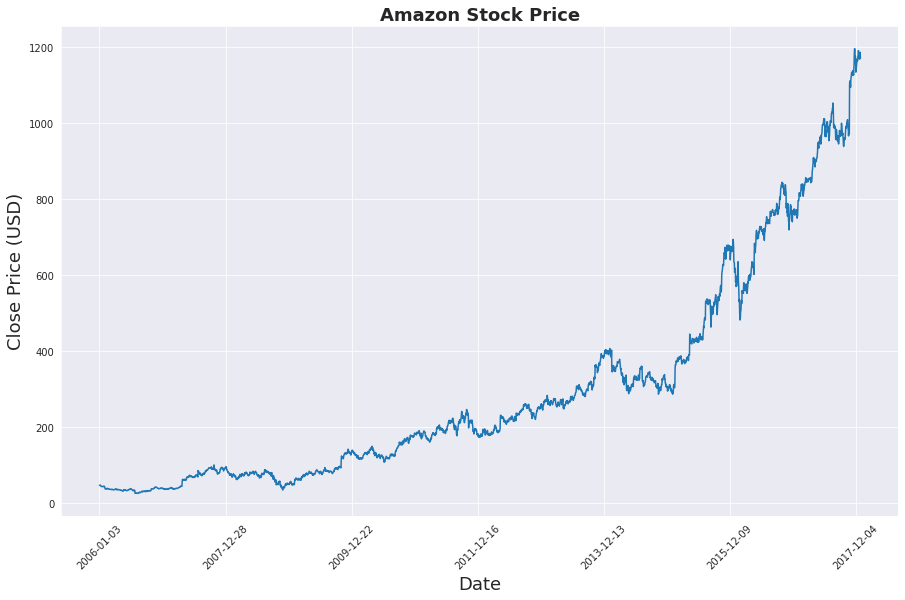

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.figure(figsize = (15,9))
plt.plot(data[['Close']])
plt.xticks(range(0,data.shape[0],500),data['Date'].loc[::500],rotation=45)
plt.title("Amazon Stock Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

In [10]:
price = data[['Close']]
price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3019 entries, 0 to 3018
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3019 non-null   float64
dtypes: float64(1)
memory usage: 47.2 KB


In [11]:
# Prices before normalizing
price['Close']

0         47.58
1         47.25
2         47.65
3         47.87
4         47.08
         ...   
3014    1168.36
3015    1176.76
3016    1182.26
3017    1186.10
3018    1169.47
Name: Close, Length: 3019, dtype: float64

# Normalize the stock value prediction

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
price['Close'] = scaler.fit_transform(price['Close'].values.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [13]:
# Prices AFTER normalizing
price['Close']

0      -0.963223
1      -0.963787
2      -0.963104
3      -0.962727
4      -0.964078
          ...   
3014    0.953033
3015    0.967395
3016    0.976799
3017    0.983364
3018    0.954931
Name: Close, Length: 3019, dtype: float64

# Example how to prepare the data:

In [14]:
stock_data_raw = price.to_numpy()  # Convert to numpy array
print(stock_data_raw.shape)

data_temp = []

for index in range(len(stock_data_raw) - 20):  
  data_temp.append(stock_data_raw[index: index + 20])  # Slide a window of size 20, and record the data scanned by that window into a list

data_temp = np.array(data_temp)  # Convert into an array of shape  N x 20 x 1
print("your data_temp has a shape = ", data_temp.shape)
print(data_temp[0])
print(data_temp[1])

(3019, 1)
your data_temp has a shape =  (2999, 20, 1)
[[-0.96322323]
 [-0.96378744]
 [-0.96310354]
 [-0.9627274 ]
 [-0.9640781 ]
 [-0.96652305]
 [-0.96775407]
 [-0.96872863]
 [-0.96866024]
 [-0.96934414]
 [-0.96879702]
 [-0.96857475]
 [-0.96948092]
 [-0.96980577]
 [-0.96930994]
 [-0.97002804]
 [-0.96818151]
 [-0.96725824]
 [-0.96770278]
 [-0.96794214]]
[[-0.96378744]
 [-0.96310354]
 [-0.9627274 ]
 [-0.9640781 ]
 [-0.96652305]
 [-0.96775407]
 [-0.96872863]
 [-0.96866024]
 [-0.96934414]
 [-0.96879702]
 [-0.96857475]
 [-0.96948092]
 [-0.96980577]
 [-0.96930994]
 [-0.97002804]
 [-0.96818151]
 [-0.96725824]
 [-0.96770278]
 [-0.96794214]
 [-0.96937833]]


In [15]:
def split_data(stock, lookback):
    data_raw = stock.to_numpy() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - lookback): 
        data.append(data_raw[index: index + lookback])
    
    data = np.array(data)

    # Now, split the array into training and testing datasets 
    # Where train = first 80% of the data
    # and the test = the last 20% of the data
    test_set_size = int(np.round(0.2*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);
    
    x_train = data[:train_set_size,:-1,:]  # X_train = the first 19 data points of each window
    y_train = data[:train_set_size,-1,:]   # Y_train = the last data point of each window
    
    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]

    # !!!!!!!!!!!!!! Important !!!!!!!!!!!!!!!!!!!! 
    # You must not shuffle the train or test datasets
    # since this is a time series and each datapoint is correlated
    # To the previous and future datapoints
    
    return [x_train, y_train, x_test, y_test]

# Prepare data

In [16]:
lookback = 20 # choose sequence length (window size)
x_train, y_train, x_test, y_test = split_data(price, lookback)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (2399, 19, 1)
y_train.shape =  (2399, 1)
x_test.shape =  (600, 19, 1)
y_test.shape =  (600, 1)


# Convert data into tensors

In [ ]:
# Convert everything into tensors for training
import torch
import torch.nn as nn

x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train_lstm = torch.from_numpy(y_train).type(torch.Tensor)
y_test_lstm = torch.from_numpy(y_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)

# Hyperparameters

In [41]:
input_dim = 1       # Because X_train has shape = N x 19 x 1  --> so input dim = 1 since we are only training on a single value: PRICE
hidden_dim = 32     # Size of the h_t 
num_layers = 2      # This means we will have 2 LSTM cells
output_dim = 1      # The size of our prediction. Since we are predicting a single value (pricee) then output_dim = 1
num_epochs = 100    # Number of epochs to train for. In LSTM this value is usually high

In [42]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

# Initialize your model

In [43]:
model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

# MSE Loss since our problem is regression, not classification!
criterion = torch.nn.MSELoss(reduction='mean')  

# Now visualize your model!

In [ ]:
%pip install -U git+https://github.com/szagoruyko/pytorchviz.git@master
from torchviz import make_dot, make_dot_from_trace
# Make a random set of data, just for visualization purposes
x = torch.randn(19,1)
make_dot(model(x), params=dict(model.named_parameters()))

In [44]:
import time

hist = np.zeros(num_epochs)
start_time = time.time()
lstm = []

for t in range(num_epochs):
    y_train_pred = model(x_train)

    loss = criterion(y_train_pred, y_train_lstm)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()
    
training_time = time.time()-start_time
print("Training time: {}".format(training_time))

Epoch  0 MSE:  0.5976637005805969
Epoch  1 MSE:  0.4247839152812958
Epoch  2 MSE:  0.2536982297897339
Epoch  3 MSE:  0.07569726556539536
Epoch  4 MSE:  0.12472156435251236
Epoch  5 MSE:  0.09097462892532349
Epoch  6 MSE:  0.03854142874479294
Epoch  7 MSE:  0.039143458008766174
Epoch  8 MSE:  0.05397126078605652
Epoch  9 MSE:  0.06169639155268669
Epoch  10 MSE:  0.05966269224882126
Epoch  11 MSE:  0.05164254829287529
Epoch  12 MSE:  0.042519450187683105
Epoch  13 MSE:  0.036327049136161804
Epoch  14 MSE:  0.03508027270436287
Epoch  15 MSE:  0.03803841769695282
Epoch  16 MSE:  0.042134497314691544
Epoch  17 MSE:  0.044056396931409836
Epoch  18 MSE:  0.04262351244688034
Epoch  19 MSE:  0.039104659110307693
Epoch  20 MSE:  0.03562760725617409
Epoch  21 MSE:  0.0336330346763134
Epoch  22 MSE:  0.0333770215511322
Epoch  23 MSE:  0.03424261137843132
Epoch  24 MSE:  0.035295404493808746
Epoch  25 MSE:  0.035741228610277176
Epoch  26 MSE:  0.0351848229765892
Epoch  27 MSE:  0.033691756427288055

In [45]:
# Convert prediction and test data into arrays
y_train_pred = y_train_pred.detach().numpy()
y_train_lstm = y_train_lstm.detach().numpy()

# Convert into dataframes
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred))
original = pd.DataFrame(scaler.inverse_transform(y_train_lstm))

# Plot the training data VS the prediction of the training data

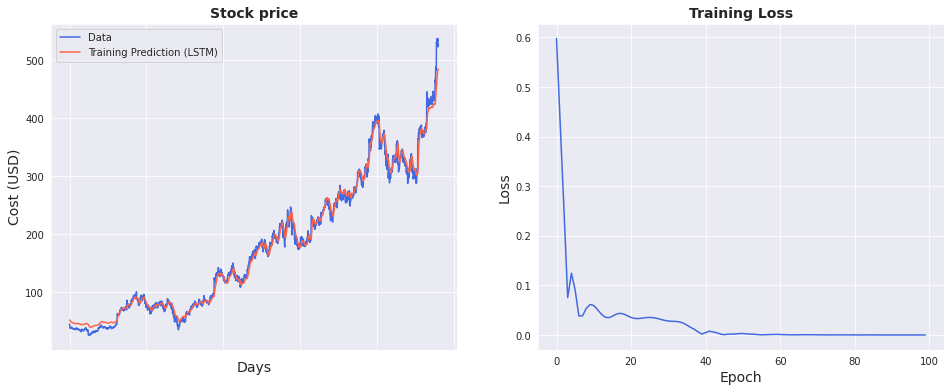

In [46]:
import seaborn as sns
sns.set_style("darkgrid")    

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)  # plt.subplot(number of rows, number of columns, position)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (LSTM)", color='tomato')
ax.set_title('Stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)

plt.subplot(1, 2, 2)  # plt.subplot(number of rows, number of columns, position)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

# Now, predict the testing data

In [48]:
import math, time
from sklearn.metrics import mean_squared_error

# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred)
y_train = scaler.inverse_transform(y_train_lstm)
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_lstm.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
lstm.append(trainScore)
lstm.append(testScore)
lstm.append(training_time)

Train Score: 10.56 RMSE
Test Score: 255.37 RMSE


In [56]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(price)  # np.empty_like == makes an empty numpy array the same shape as price
trainPredictPlot[:, :] = np.nan  # fill the empty array with NAN values
# substitute NAN values starting at position = window size since we had to use the first
# 20 points to train, thus, these first 20 points have no prediction
trainPredictPlot[lookback:len(y_train_pred)+lookback, :] = y_train_pred 



# do the same for the test prediction plot
testPredictPlot = np.empty_like(price)
testPredictPlot[:, :] = np.nan
# For test, we only have to substitute the last 20% of the points,
# thats why we start at the len(y_train_pred) 
testPredictPlot[len(y_train_pred)+lookback-1:len(price)-1, :] = y_test_pred

original = scaler.inverse_transform(price['Close'].values.reshape(-1,1))

predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
predictions = np.append(predictions, original, axis=1)

# convert the result into dataframe. Therefore, the shape of this dataframe
# is: N rows x 3 columns, where column 1 = 
result = pd.DataFrame(predictions)
print(result)

       0           1        2
0    NaN         NaN    47.58
1    NaN         NaN    47.25
2    NaN         NaN    47.65
3    NaN         NaN    47.87
4    NaN         NaN    47.08
...   ..         ...      ...
3014 NaN  645.685181  1168.36
3015 NaN  645.626709  1176.76
3016 NaN  645.553955  1182.26
3017 NaN  645.568542  1186.10
3018 NaN         NaN  1169.47

[3019 rows x 3 columns]


[]

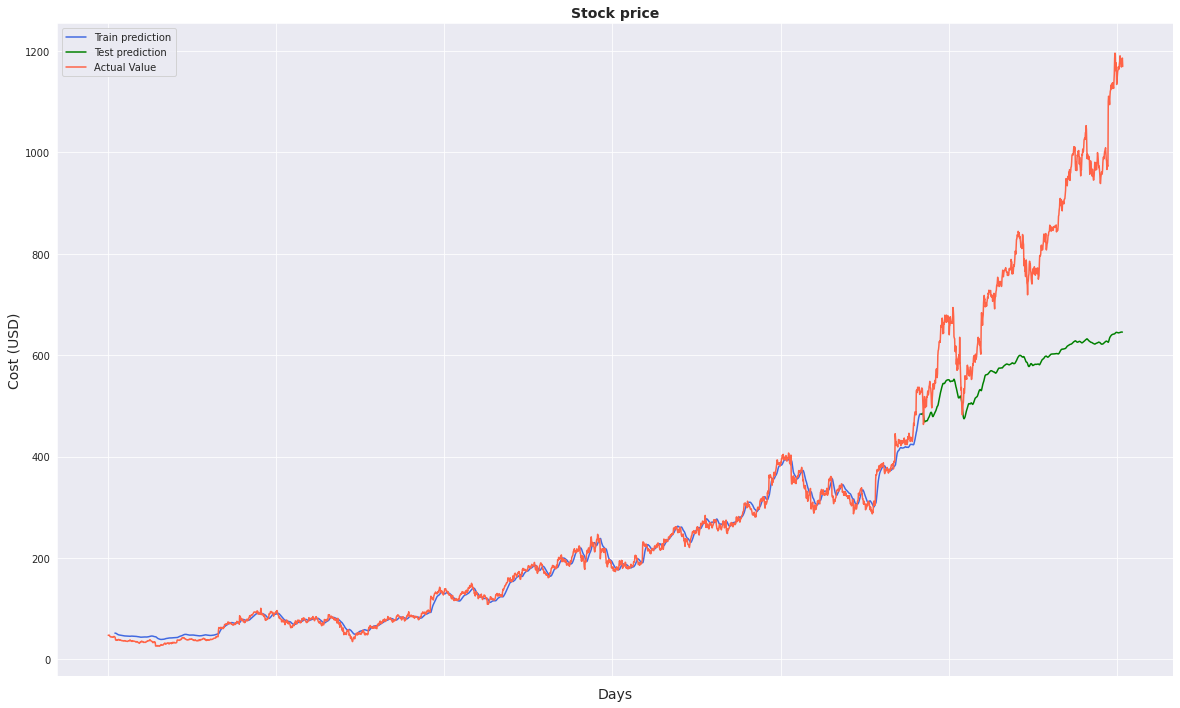

In [60]:
import seaborn as sns
sns.set_style("darkgrid")    

fig = plt.figure(figsize=(20,12))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 1, 1)  # plt.subplot(number of rows, number of columns, position)
ax = sns.lineplot(x = result.index, y = result[0], label="Train prediction", color='royalblue')
ax = sns.lineplot(x = result.index, y = result[1], label="Test prediction", color='green')
ax = sns.lineplot(x = result.index, y = result[2], label="Actual Value", color='tomato')
ax.set_title('Stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)
